In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


importing libraries required for plotting and calculations

In [ ]:
pwd

'/content'

Checking present working directory

In [ ]:
missing_values = ["n.a.","NA","n/a", "na", 0]
df_cpu = pd.read_csv('/content/CPU_benchmark_v4.csv',na_values = missing_values)

Preprocessing step to read all missing values


In [ ]:
df_cpu

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,NaN,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,NaN,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,NaN,84,NaN,225,NaN,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,NaN,83,NaN,180,NaN,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,NaN,81,NaN,223,NaN,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,NaN,80,NaN,83,NaN,5.0,16.08,1,2017,NanoBGA2,Laptop


display all the dataset including null values


In [ ]:
df_cpu.dropna(axis=0,inplace=True)

Preprocessing step: removing all the null values in the table

In [ ]:
df_cpu.describe

<bound method NDFrame.describe of                                 cpuName    price  cpuMark  cpuValue  \
1                         AMD EPYC 7763  7299.99    88338     12.10   
3                         AMD EPYC 7713  7060.00    85861     12.16   
4     AMD Ryzen Threadripper PRO 3995WX  6807.98    83971     12.33   
5          AMD Ryzen Threadripper 3990X  8399.69    81568      9.71   
8                         AMD EPYC 7643  5424.99    76455     14.09   
...                                 ...      ...      ...       ...   
3696                AMD Athlon XP 1800+    50.95      195      3.83   
3697                AMD Athlon XP 2000+    58.99      195      3.31   
3725          Intel Atom D410 @ 1.66GHz   635.99      177      0.28   
3727                AMD Athlon XP 1700+    51.25      176      3.44   
3747         Intel Atom E3815 @ 1.46GHz   135.00      159      1.17   

      threadMark  threadValue    TDP powerPerf  cores  testDate  \
1           2635         0.36  280.0    315.49

To check if all null values are removed


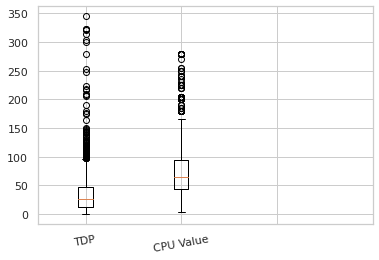

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


cpu_price = df_cpu["TDP"]
cpu_value = df_cpu['cpuValue']


columns = [cpu_value,cpu_price]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4], ["TDP", "CPU Value"], rotation=10)
plt.show()

In boxplot we are plotting CPU price against CPU value as seen in the figure
It provides a data set description

we have used two list here to get coloums CPU value and the price 
we assigned it to a new list
we use the boxplot funtion to create the plot.
labels are also shown

I've used this funtion to get an idea of the distribution of cpy value and the TDP which is the power consumption

In [ ]:
df_cpu.rename(columns = {'cores':'coreCount'}, inplace = True)

I've used rename funtion to change the coloum name core to coreCount as it fits with the other attributes. 

In [ ]:
df_cpu

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,coreCount,testDate,socket,category
1,AMD EPYC 7763,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
3,AMD EPYC 7713,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop
5,AMD Ryzen Threadripper 3990X,8399.69,81568,9.71,2569,0.31,280.0,291.31,64,2020,sTRX4,Desktop
8,AMD EPYC 7643,5424.99,76455,14.09,2695,0.50,225.0,339.8,48,2021,SP3,Server
...,...,...,...,...,...,...,...,...,...,...,...,...
3696,AMD Athlon XP 1800+,50.95,195,3.83,301,5.90,66.0,2.96,1,2009,Socket A,Desktop
3697,AMD Athlon XP 2000+,58.99,195,3.31,311,5.28,70.0,2.79,1,2009,Socket A,Desktop
3725,Intel Atom D410 @ 1.66GHz,635.99,177,0.28,254,0.40,10.0,17.7,1,2010,BGA559,Desktop
3727,AMD Athlon XP 1700+,51.25,176,3.44,272,5.30,64.0,2.75,1,2009,Socket A (462),Desktop


In [ ]:
gk = df_cpu.groupby('socket')
gk.first()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,coreCount,testDate,category
socket,,,,,,,,,,,
754,AMD Athlon 64 3400+,99.95,375,3.75,429,4.29,89.0,4.21,1,2009,Unknown
939,AMD Opteron 180,119.95,746,6.22,874,7.29,110.0,6.78,2,2009,Server
940,AMD Phenom 8250e Triple-Core,46.99,1084,23.08,729,15.52,65.0,16.68,3,2009,Desktop
"AM1,FS1B",AMD Athlon 5370 APU,598.68,1923,3.21,755,1.26,25.0,76.92,4,2016,Desktop
"AM1,FS1b",AMD Athlon 5150 APU,98.86,1389,14.05,550,5.56,25.0,55.57,4,2014,Desktop
...,...,...,...,...,...,...,...,...,...,...,...
sTR4,AMD Ryzen Threadripper 2990WX,2100.00,32475,15.46,2290,1.09,250.0,129.9,32,2018,Desktop
sTRX4,AMD Ryzen Threadripper 3990X,8399.69,81568,9.71,2569,0.31,280.0,291.31,64,2020,Desktop
sWRX8,AMD Ryzen Threadripper PRO 3995WX,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,Desktop


I've used this funtion to group all the CPU's by their socket type and listing all the first entries to check if the categorisatio is done by the socket type and not the cpu name


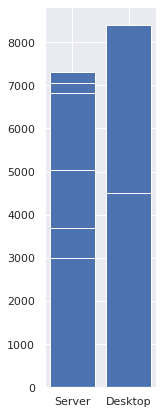

In [ ]:
df_cpu.head()
df = pd.DataFrame(df_cpu)
 
name = df_cpu['category'].head(12)
price = df['price'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(2, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:15], price[0:15])
 
# Show Plot
plt.show()

I've used box plot to get the estimate usecase of the processors in different category to include Server and Desktop

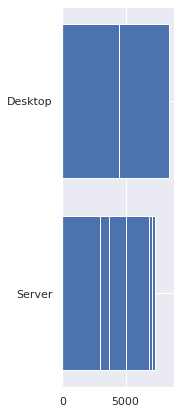

In [ ]:
df_cpu.head()
df = pd.DataFrame(df_cpu)
 
name = df_cpu['category'].head(12)
price = df['price'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(2, 7))
 
# Horizontal Bar Plot
plt.barh(name[0:15], price[0:15])
 
# Show Plot
plt.show()

barh() funtion can be used to display the bar graph in horizontal format

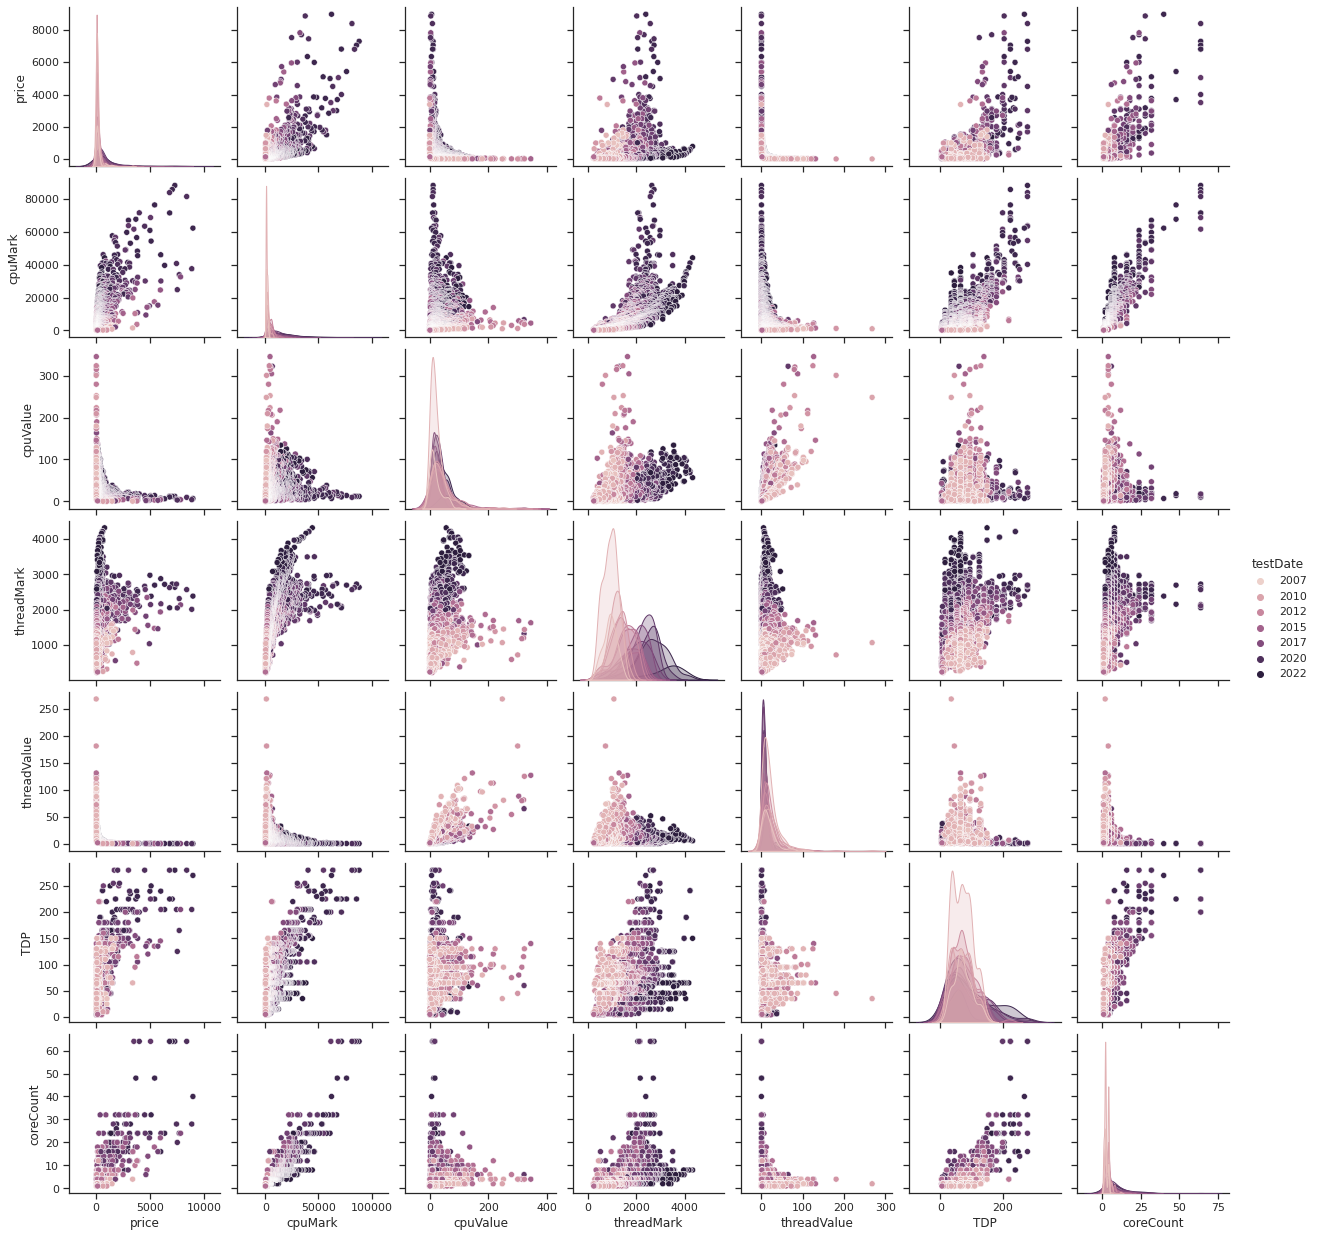

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.pairplot(df_cpu, hue="testDate")

Scatter plot will help me the relationship between two variables. I've used a matrix style presentation to get details of any two attributes in the graph. This would help me the understand how the data is scattered and where the concentration of the data is more

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


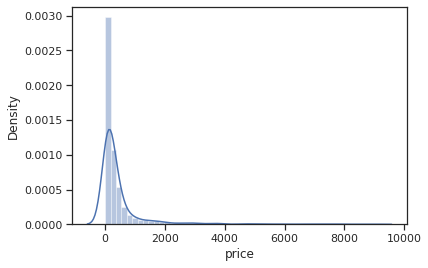

In [ ]:
sns.set_theme(style="ticks")
sns.distplot(df_cpu["price"])

Distribution plot will help me to compare the range and distribution of the numerical data . Here i've used the price distribtion and most of the CPU prices fall under the range of 0 to 2000.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


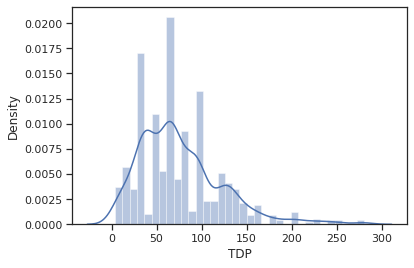

In [ ]:
TDP = df_cpu['TDP']
sns.distplot(TDP)


I've used the same plot to check the TDP distribution which is the powerconsumption value. I can see most cpu are in the range of 60W atts TDP

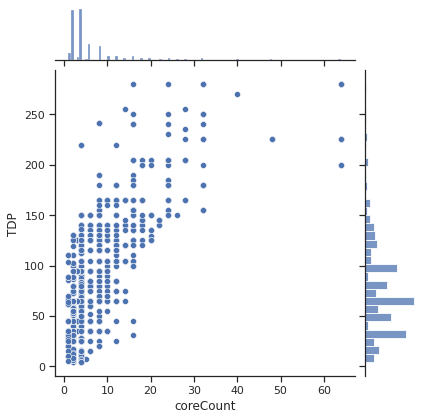

In [ ]:
sns.jointplot(data=df_cpu, x="coreCount", y="TDP")

In joint plot I'm plotting the powerconsumption value againt the number of cores. Here i was able to understand that as core count increases the TDP also increases and most cpu are under 20 cores and they cosnume less than 150 TDP in general

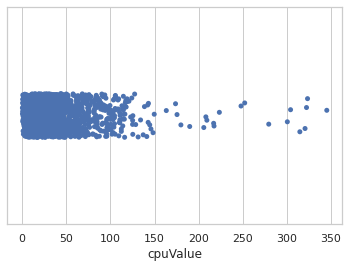

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x=df_cpu["cpuValue"])

By using strip plot i was able understand that most cpu values fall under the range of 50 to 100 and very few cpu in the range of 350 in terms of their value

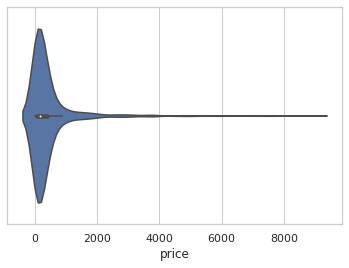

In [ ]:
ax = sns.violinplot(x=df_cpu["price"])

I can use violin plot to get an idea about the price distribution range and by how much it varies

In [ ]:
sns.heatmap(df_cpu["powerPerf"])

IndexError: ignored

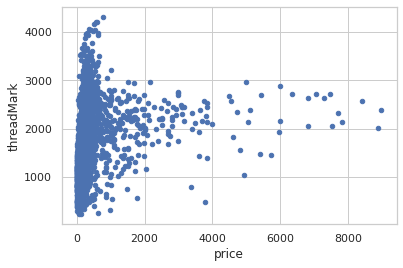

In [ ]:
df_cpu.plot(kind='scatter',x='price',y='threadMark') # scatter plot

another use of scatter plot is I'm comparing two value and i can see that even though some cpu which are expensive they don't have the required threadmaek scores

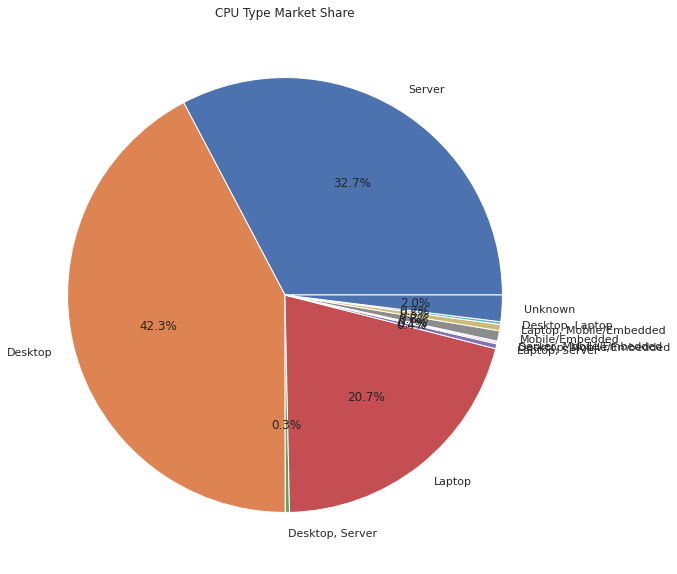

In [ ]:
cputype= (df_cpu['category'].value_counts(sort=False))
cputype
cputype_names = (df_cpu['category'].unique())
list(cputype_names)

fig = plt.figure(figsize =(10, 10))
plt.pie(cputype, labels=cputype_names, autopct='%1.1f%%')
plt.title('CPU Type Market Share')
plt.show()

Py chart will give me a visualization of the total percentage distribution of the categories. I can see that most cpu's fall under  the desktop categaory

In [ ]:
df_cpu.corr(method ='pearson')

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,coreCount,testDate
price,1.000000,0.691836,-0.236355,0.251219,-0.311075,0.562841,0.766716,0.330107
cpuMark,0.691836,1.000000,0.050120,0.623898,-0.302065,0.669211,0.883812,0.611129
cpuValue,-0.236355,0.050120,1.000000,0.184760,0.659108,0.097911,-0.020768,0.083095
threadMark,0.251219,0.623898,0.184760,1.000000,-0.207682,0.274486,0.330965,0.778251
threadValue,-0.311075,-0.302065,0.659108,-0.207682,1.000000,-0.142167,-0.279650,-0.286867
TDP,0.562841,0.669211,0.097911,0.274486,-0.142167,1.000000,0.676485,0.133930
coreCount,0.766716,0.883812,-0.020768,0.330965,-0.279650,0.676485,1.000000,0.416417
testDate,0.330107,0.611129,0.083095,0.778251,-0.286867,0.133930,0.416417,1.000000


the correlation funtion wis used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded so i don't have to manually remove the null values. I can cross view against all the coloums in the view

In [ ]:
from sklearn.impute import SimpleImputer
df = pd.read_csv('CPU_benchmark_v4.csv')
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['price']])
df['price'] = imputer.transform(df[['price']])
df

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,441.500946,108822,NaN,3330,NaN,280.0,388.65,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,7299.990000,88338,12.10,2635,0.36,280.0,315.49,64,2021,SP3,Server
2,AMD EPYC 7J13,441.500946,86006,NaN,2387,NaN,NaN,NaN,64,2021,unknown,Server
3,AMD EPYC 7713,7060.000000,85861,12.16,2727,0.39,225.0,381.6,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,6807.980000,83971,12.33,2626,0.39,280.0,299.9,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,441.500946,84,NaN,225,NaN,38.0,2.22,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,441.500946,83,NaN,180,NaN,54.7,1.52,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,441.500946,81,NaN,223,NaN,57.8,1.41,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,441.500946,80,NaN,83,NaN,5.0,16.08,1,2017,NanoBGA2,Laptop


imputer is one techinique that is used to replace null values or missing data with any of the methods which include mean meadian mode of the nearby values. This eliminates the deletion of null rows hence these daata is preserved